In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
import seaborn as sns
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
import re
import os
print(os.listdir("../input"))

from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, learning_curve, StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier

# Any results you write to the current directory are saved as output.

['Dataset_spine.csv']


Using TensorFlow backend.


In [2]:
data = pd.read_csv('../input/Dataset_spine.csv')
data.head()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Class_att,Unnamed: 13
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal,NaN
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal,NaN
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal,Prediction is done by using binary classificat...
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal,NaN
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal,NaN


In [3]:
Attribute = data.iloc[:,-1].dropna().tolist()
Attribute

['Prediction is done by using binary classification.',
 'Attribute1  = pelvic_incidence  (numeric) ',
 'Attribute2 = pelvic_tilt (numeric) ',
 'Attribute3 = lumbar_lordosis_angle (numeric) ',
 'Attribute4 = sacral_slope (numeric) ',
 'Attribute5 = pelvic_radius (numeric) ',
 'Attribute6 = degree_spondylolisthesis (numeric) ',
 ' Attribute7= pelvic_slope(numeric)',
 ' Attribute8= Direct_tilt(numeric)',
 ' Attribute9= thoracic_slope(numeric)',
 ' Attribute10= cervical_tilt(numeric)',
 ' Attribute11=sacrum_angle(numeric)',
 ' Attribute12= scoliosis_slope(numeric)',
 'Attribute class {Abnormal, Normal} ']

In [4]:
column_name = []
for i in range(1, len(Attribute)-1):
    column_name.append(re.findall(r'\w+_\w+',Attribute[i])[0])
column_name.append('Class')
column_name

['pelvic_incidence',
 'pelvic_tilt',
 'lumbar_lordosis_angle',
 'sacral_slope',
 'pelvic_radius',
 'degree_spondylolisthesis',
 'pelvic_slope',
 'Direct_tilt',
 'thoracic_slope',
 'cervical_tilt',
 'sacrum_angle',
 'scoliosis_slope',
 'Class']

In [5]:
data.drop('Unnamed: 13', axis = 1, inplace = True)

In [6]:
data.columns = column_name

In [7]:
data.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,Class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal


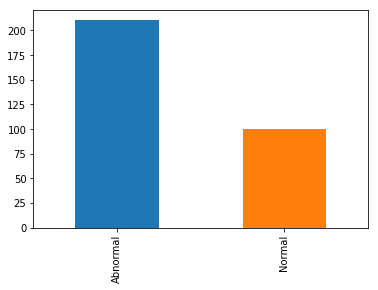

In [8]:
data["Class"].value_counts().sort_index().plot.bar()

In [18]:
data = pd.get_dummies(data, drop_first=True)

In [19]:
data.describe()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,Class_Normal
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694,0.472979,21.321526,13.064511,11.933317,-14.053139,25.645981,0.322581
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027,0.285787,8.639423,3.399713,2.893265,12.225582,10.450558,0.468220
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179,0.003220,7.027000,7.037800,7.030600,-35.287375,7.007900,0.000000
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727,0.224367,13.054400,10.417800,9.541140,-24.289522,17.189075,0.000000
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934,0.475989,21.907150,12.938450,11.953835,-14.622856,24.931950,0.000000
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352,0.704846,28.954075,15.889525,14.371810,-3.497094,33.979600,1.000000
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082,0.998827,36.743900,19.324000,16.821080,6.972071,44.341200,1.000000


In [20]:
X = data.iloc[:,:-1].values
y = data.iloc[:,-1:].values

In [21]:
std = StandardScaler()
X_scale = std.fit_transform(X)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size=0.2,random_state = 42)

In [23]:
modelLR1 = LogisticRegression(C = 0.5)
modelLR1.fit(X_train,y_train)
kfold = StratifiedKFold(n_splits = 10, shuffle=True , random_state=42)
results = cross_val_score(modelLR1, X, y, cv=kfold, scoring = 'accuracy')
print(results.mean())

0.8258064516129032


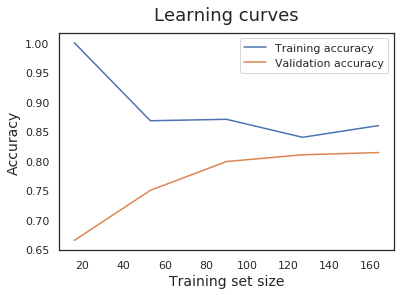

In [24]:
train_sizes, train_scores, validation_scores = learning_curve(estimator=modelLR1,X= X_train,y = y_train, cv= 3,
                                                              scoring='accuracy')
train_scores_mean = train_scores.mean(axis = 1)
validation_scores_mean = validation_scores.mean(axis = 1)

plt.plot(train_sizes, train_scores_mean, label = 'Training accuracy')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation accuracy')
plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
title = 'Learning curves' 
plt.title(title, fontsize = 18, y = 1.03)
plt.legend()

In [25]:
confusion_matrix(y_test, modelLR1.predict(X_test))

array([[39,  5],
       [ 3, 15]])

In [26]:
poly = PolynomialFeatures(degree = 2, interaction_only=True)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
X_train_poly.shape

(248, 79)

In [27]:
modelLR2 = LogisticRegression(C = 0.5)
modelLR2.fit(X_train_poly,y_train)
kfold = StratifiedKFold(n_splits = 10, shuffle=True , random_state=42)
results = cross_val_score(modelLR2, X_train_poly, y_train, cv=kfold, scoring = 'accuracy')
print(results.mean())

0.7903461538461538


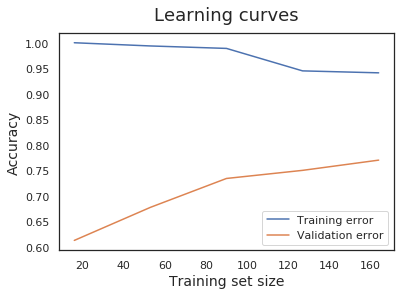

In [28]:
train_sizes, train_scores, validation_scores = learning_curve(estimator=modelLR2,X= X_train_poly,y = y_train, cv= 3,
                                                              scoring='accuracy')
train_scores_mean = train_scores.mean(axis = 1)
validation_scores_mean = validation_scores.mean(axis = 1)

plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
title = 'Learning curves' 
plt.title(title, fontsize = 18, y = 1.03)
plt.legend()

In [29]:
confusion_matrix(y_test, modelLR2.predict(X_test_poly))

array([[37,  7],
       [ 6, 12]])

In [30]:
modelLR3 = LogisticRegression(C = 0.1)
modelLR3.fit(X_train_poly,y_train)
kfold = StratifiedKFold(n_splits = 10, shuffle=True , random_state=42)
results = cross_val_score(modelLR3, X, y, cv=kfold, scoring = 'accuracy')
print(results.mean())

0.8225806451612903


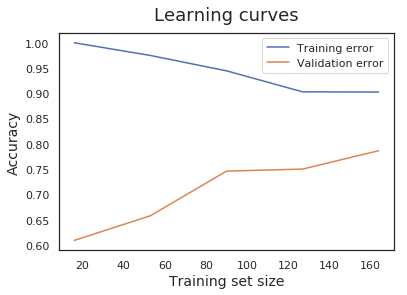

In [31]:
train_sizes, train_scores, validation_scores = learning_curve(estimator=modelLR3,X= X_train_poly,y = y_train, cv= 3,
                                                              scoring='accuracy')
train_scores_mean = train_scores.mean(axis = 1)
validation_scores_mean = validation_scores.mean(axis = 1)

plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
title = 'Learning curves' 
plt.title(title, fontsize = 18, y = 1.03)
plt.legend()

In [32]:
confusion_matrix(y_test, modelLR3.predict(X_test_poly))

array([[39,  5],
       [ 6, 12]])

In [33]:
def create_model():
    model = Sequential()
    model.add(Dense(24, activation = 'relu', input_shape = (12,)))
#     model.add(Dropout(rate = 0.3))
    model.add(Dense(48, activation = 'relu'))
    model.add(Dropout(rate = 0.3))
    model.add(Dense(24, activation = 'relu'))
#     model.add(Dropout(rate = 0.3))
    model.add(Dense(6, activation = 'relu'))
#     model.add(Dropout(rate = 0.3))
    model.add(Dense(1, activation = 'sigmoid'))
    model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return model

In [34]:
model = create_model()
results = model.fit(X_train, y_train, batch_size=8, epochs = 100, validation_data=(X_test, y_test), verbose=0)
print(np.mean(results.history["val_acc"]))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
0.834838711484786


In [ ]:
modelann = KerasClassifier(build_fn=create_model, epochs = 50, batch_size = 8, verbose = 0)

kfold = StratifiedKFold(n_splits = 10, shuffle=True , random_state=42)
results = cross_val_score(modelann, X, y, cv=kfold, scoring = 'accuracy')
print(results.mean())

In [ ]:
train_sizes, train_scores, validation_scores = learning_curve(estimator=modelann,X= X,y = y, cv= 3,
                                                              scoring='accuracy', random_state = 42)
train_scores_mean = train_scores.mean(axis = 1)
validation_scores_mean = validation_scores.mean(axis = 1)

plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
title = 'Learning curves' 
plt.title(title, fontsize = 18, y = 1.03)
plt.legend()